# Задания для Семинара 2: Продвинутый уровень

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

Выполнил:  
**Вольхин Данил Федорович**

Email:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

Дата:  
**31 января 2025**

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

😊 Первый раз в жизни делаю посадку на юпитер 😊

## ANSI коды для цветов текста

In [1]:
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"  # сброс цветов до стандартных

## Шаблоны markdown

<span style="color: green;"># Это комментарий в коде</span><br>
<span style="color: blue;">def</span> greet(name):<br>
<span style="color: red;">print</span>(f"Hello, {name}!")
<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">
<pre style="background-color: #F5F5F5; padding: 10px; border-radius: 5px; font-family: monospace;">code</pre>

## Установка библиотек

In [2]:
# !pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 --index-url https://download.pytorch.org/whl/cu116
# !pip install tensorboard==2.10.1 tensorflow==2.10.0
# !pip install pydantic==2.10.3
# !pip install tqdm==4.66.2
# !pip install scikit-learn==1.5.1
# !pip install scipy==1.13.1
# !pip install seaborn==0.13.2
# !pip install rich==13.7.1
# !pip install requests==2.32.3
# !pip install pillow==10.4.0
# !pip install pandas==2.2.2
# !pip install matplotlib==3.9.2
# !pip install duckdb==1.1.0
# !pip install annotated-types==0.7.0
# !pip install scikit-image

# Подготовка к написанию кода

## Импорт библиотек

In [94]:
print(f"{YELLOW}"+60*"-"+f"{RESET}")
print(f"Библиотеки: \n")

# Дополнительные библиотеки
import platform # Узнать версию пайтона ;)
import os
import logging
import time
import sys
import random
import re
import shutil
from tqdm import tqdm
from functools import wraps
from typing import Any, Tuple, Union, Optional, List, Type, Callable, Dict
from collections import Counter
import zipfile
from dataclasses import dataclass
import requests

# Основные библиотеки
import IPython.display as ipd # Добавляет виджеты для ячеек юпитера
from IPython.display import HTML
from IPython import get_ipython
import ipykernel
print(f"python: {BLUE}{platform.python_version()}{RESET} ")
import matplotlib # Для рисунков
import matplotlib.pyplot as plt
print(f"matplotlib: {BLUE}{matplotlib.__version__}{RESET}")
import numpy as np # Для работы с массивами
print(f"numpy: {BLUE}{np.__version__}{RESET}")
import pandas as pd # Работа с таблицами
print(f"pandas: {BLUE}{pd.__version__}{RESET}")
import sklearn # Много полезного для ML
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_extraction.image import extract_patches_2d
print(f"sklearn: {BLUE}{sklearn.__version__}{RESET}")
import scipy
print(f"scipy: {BLUE}{scipy.__version__}{RESET}")
import pydantic # Для валидации данных
from pydantic import (BaseModel, Field, StrictStr, condecimal, StrictInt, StrictBool,
                      FilePath, DirectoryPath, ValidationError, root_validator, ConfigDict)
print(f"pydantic: {BLUE}{pydantic.__version__}{RESET}")
import fastapi
from fastapi import HTTPException, status
print(f"fastapi: {BLUE}{fastapi.__version__}{RESET}")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
print(f"torch: {BLUE}{torch.__version__}{RESET}")
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
print(f"torchvision: {BLUE}{torchvision.__version__}{RESET}")
import requests
print(f"requests: {BLUE}{requests.__version__}{RESET}")
import PIL
from PIL import Image, ImageEnhance
print(f"pillow: {BLUE}{PIL.__version__}{RESET}")
import cv2
print(f"openCV: {BLUE}{cv2.__version__}{RESET}")
import skimage
from skimage.feature import local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops
from skimage.segmentation import felzenszwalb, slic
from skimage.util import view_as_blocks
from skimage.morphology import opening, closing
print(f"skimage: {BLUE}{skimage.__version__}{RESET}")
from kneed import KneeLocator

from rich.theme import Theme
from rich.logging import RichHandler
from rich.console import Console
from rich.pretty import install as pretty_install
from rich.traceback import install as traceback_install


print(f"{YELLOW}"+60*"-"+f"{RESET}")

------------------------------------------------------------
Библиотеки: 

python: 3.9.16 
matplotlib: 3.9.2
numpy: 1.26.4
pandas: 2.2.2
sklearn: 1.5.1
scipy: 1.13.1
pydantic: 2.10.3
fastapi: 0.115.7
torch: 1.12.1+cu116
torchvision: 0.13.1+cu116
requests: 2.32.3
pillow: 10.4.0
openCV: 4.11.0
skimage: 0.24.0
------------------------------------------------------------


## Дополнительные настройки

In [4]:
import warnings
warnings.filterwarnings("ignore")
import logging
# Отключение логирования для cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# Полезна при разработке собственных библиотек, юпитер будет переимпортировать модули, если в них были изменения
%load_ext autoreload
%autoreload 1

## Кастомный setup_logging

In [5]:
log = None

def setup_logging(clean=False, debug=False):
    global log

    if log is not None:
        return log

    try:
        if clean and os.path.isfile('setup.log'):
            os.remove('setup.log')
        time.sleep(0.1)  # prevent race condition
    except:
        pass

    if sys.version_info >= (3, 9):
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s | %(levelname)s | %(pathname)s | %(message)s',
                            filename='setup.log', filemode='a', encoding='utf-8', force=True)
    else:
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s | %(levelname)s | %(pathname)s | %(message)s',
                            filename='setup.log', filemode='a', force=True)

    console = Console(log_time=True, log_time_format='%H:%M:%S-%f', theme=Theme({
        "traceback.border": "black",
        "traceback.border.syntax_error": "black",
        "inspect.value.border": "black",
    }))
    pretty_install(console=console)
    traceback_install(console=console, extra_lines=1, width=console.width, word_wrap=False, indent_guides=False,
                      suppress=[])
    rh = RichHandler(show_time=True, omit_repeated_times=False, show_level=True, show_path=False, markup=False,
                     rich_tracebacks=True, log_time_format='%H:%M:%S-%f',
                     level=logging.DEBUG if debug else logging.INFO, console=console)
    rh.set_name(logging.DEBUG if debug else logging.INFO)
    log = logging.getLogger("sd")
    log.addHandler(rh)

    return log

In [6]:
log = setup_logging()

## Валидация входящих данных для каждого класса

### validate_with_pydantic

In [7]:
def validate_with_pydantic(model_cls):
    """
    Декоратор для валидации данных с использованием Pydantic-модели.
    """

    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            # Проверяем данные в аргументах функции
            try:
                data = kwargs.get("entry", args[0] if args else None)
                if not data:
                    raise HTTPException(status_code=status.HTTP_400_BAD_REQUEST,
                                        detail="No data provided for validation.")
                # Валидация данных
                if isinstance(data, BaseModel):
                    data = data.dict(by_alias=True)
                validated_data = model_cls(**data)
                # Передаем валидированные данные дальше
                kwargs["entry"] = validated_data
                return func(*args, **kwargs)
            except ValidationError as ve:
                log.exception("Validation failed", exc_info=ve)
                raise HTTPException(status_code=status.HTTP_400_BAD_REQUEST,
                                    detail="Invalid data for Pydantic model.") from ve

        return wrapper

    return decorator

### auto_generate_docstring

In [8]:
def auto_generate_docstring(cls: Type[BaseModel]) -> Type[BaseModel]:
    """
    Декоратор для автоматического добавления docstring в классы Pydantic.
    """

    def generate_docstring(model: Type[BaseModel]) -> str:
        """
        Генерация строки документации из описания полей модели Pydantic.
        """
        docstring = []
        for field_name, field_info in model.__fields__.items():
            field_details = f"Field '{field_name}':\n"
            if field_info.description:  # Получение описания
                field_details += f"  Description: {field_info.description}\n"
            if field_info.examples:  # Получение примеров
                field_details += f"  Examples: {field_info.examples}\n"
            docstring.append(field_details)
        return "\n".join(docstring)

    # Добавляем описание к существующему docstring
    cls.__doc__ = (cls.__doc__ or "") + "\n\n" + generate_docstring(cls)
    return cls

# Функции определенные на Семинаре 1

## Функция для сохранения изображения в папку

In [9]:
def download_image(url: str, folder_name: str, filename: str = "image.jpg"):
    os.makedirs(folder_name, exist_ok=True)
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        image_path = os.path.join(folder_name, filename)
        with open(image_path, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        log.info(f"Изображение сохранено: {image_path}")
    else:
        log.error(f"Ошибка загрузки изображения, статус: {response.status_code}")

In [10]:
#download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/2ac05362-b7b0-4d82-ae61-f827d47b6ae0/original=true,quality=90/54114847.jpeg",
#               "./cv_seminar_1",
#               "example.jpg")

## Функция для загрузки и отображения с помощью OpenCV | PIL

In [11]:
def imgop(path_to_img, lib: str = "cv2", show: bool = False, show_jupyter: bool = False, fixed_size: tuple = (300, 300), grayscale: bool = False):
    liblist = ["cv2", "PIL"]
    
    assert lib in liblist, f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}"
    
    if not os.path.exists(path_to_img):
        log.error("Проверьте, что изображение существует")
        return None
    
    try:
        if lib == "cv2":
            flag = cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR
            img = cv2.imread(path_to_img, flag)
            if img is None:
                raise ValueError("Не удалось загрузить изображение с помощью OpenCV.")
            if show:
                cv2.imshow("Image", img)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            if show_jupyter:
                if grayscale:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}" style="filter: grayscale(100%);">'))
                else:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
        elif lib == "PIL":
            img = Image.open(path_to_img)
            if grayscale:
                img = img.convert("L")
            if show:
                img.show()
            if show_jupyter:
                if grayscale:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}" style="filter: grayscale(100%);">'))
                else:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
        return img
    except Exception as ex:
        log.exception("Ошибка при обработке изображения", exc_info=ex)
        return None

In [12]:
# img = imgop("./cv_seminar2", lib="cv2")

## Функция для разделения изображения на три канала

In [13]:
def splitchenal(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    show_jupyter: bool = False,
    save_path: str = "./",
    color_space: str = "RGB",
):

    # Проверка корректности параметров
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert color_space in ["RGB", "HSV", "LAB", "GRAY"], log.error("Некорректное цветовое пространство. Доступные варианты: RGB, HSV, LAB, GRAY.")

    # Создание директории для сохранения, если она не существует
    os.makedirs(save_path, exist_ok=True)

    # Преобразование изображения в numpy.ndarray, если это PIL.Image
    if lib == "cv2":
        if isinstance(img, Image.Image):  # Если изображение в формате PIL
            img = np.array(img)  # Преобразуем PIL.Image в numpy.ndarray
            if img.ndim == 3 and img.shape[2] == 4:  # Если изображение RGBA
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)  # Преобразуем RGBA в BGR
            elif img.ndim == 3 and img.shape[2] == 3:  # Если изображение RGB
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Преобразуем RGB в BGR
        elif isinstance(img, np.ndarray):  # Если изображение уже в формате OpenCV
            if img.ndim == 3 and img.shape[2] == 4:  # Если изображение BGRA
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)  # Преобразуем BGRA в BGR
    elif lib == "PIL":
        if isinstance(img, np.ndarray):  # Если изображение в формате OpenCV
            if img.ndim == 3 and img.shape[2] == 3:  # Если изображение BGR
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Преобразуем BGR в RGB
                img = Image.fromarray(img)  # Преобразуем numpy.ndarray в PIL.Image
            elif img.ndim == 3 and img.shape[2] == 4:  # Если изображение BGRA
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)  # Преобразуем BGRA в RGB
                img = Image.fromarray(img)  # Преобразуем numpy.ndarray в PIL.Image
        elif isinstance(img, Image.Image):  # Если изображение уже в формате PIL
            pass  # Оставляем как есть

    # Преобразование изображения в нужное цветовое пространство
    if lib == "cv2":
        if color_space == "HSV":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == "LAB":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        elif color_space == "GRAY":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif lib == "PIL":
        if color_space == "HSV":
            img = img.convert("HSV")
        elif color_space == "LAB":
            img = img.convert("LAB")
        elif color_space == "GRAY":
            img = img.convert("L")

    # Разделение каналов
    if color_space == "GRAY":
        channels = {"Gray": img}
    else:
        if lib == "cv2":
            channels_split = cv2.split(img)
        elif lib == "PIL":
            channels_split = img.split()
        channel_names = {
            "RGB": ["Blue", "Green", "Red"],
            "HSV": ["Hue", "Saturation", "Value"],
            "LAB": ["Luminance", "A", "B"],
        }[color_space]
        channels = {name: ch for name, ch in zip(channel_names, channels_split)}

    # Сохранение и отображение каналов
    for color, ch_img in channels.items():
        if lib == "cv2":
            if color_space == "GRAY":
                path = os.path.join(save_path, f"{color}_channel.jpg")
                cv2.imwrite(path, ch_img)
            else:
                zeros = np.zeros_like(ch_img)  # Черный канал
                if color_space == "RGB":
                    if color == "Blue":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "Green":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "Red":
                        merged = cv2.merge([zeros, zeros, ch_img])
                elif color_space == "HSV":
                    if color == "Hue":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "Saturation":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "Value":
                        merged = cv2.merge([zeros, zeros, ch_img])
                elif color_space == "LAB":
                    if color == "Luminance":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "A":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "B":
                        merged = cv2.merge([zeros, zeros, ch_img])
                path = os.path.join(save_path, f"{color}_channel.jpg")
                cv2.imwrite(path, merged)
        elif lib == "PIL":
            if color_space == "GRAY":
                path = os.path.join(save_path, f"{color}_channel.jpg")
                ch_img.save(path)
            else:
                zeros = Image.new("L", img.size, 0)
                if color_space == "RGB":
                    if color == "Blue":
                        merged = Image.merge("RGB", (ch_img, zeros, zeros))
                    elif color == "Green":
                        merged = Image.merge("RGB", (zeros, ch_img, zeros))
                    elif color == "Red":
                        merged = Image.merge("RGB", (zeros, zeros, ch_img))
                elif color_space == "HSV":
                    if color == "Hue":
                        merged = Image.merge("HSV", (ch_img, zeros, zeros))
                    elif color == "Saturation":
                        merged = Image.merge("HSV", (zeros, ch_img, zeros))
                    elif color == "Value":
                        merged = Image.merge("HSV", (zeros, zeros, ch_img))
                elif color_space == "LAB":
                    if color == "Luminance":
                        merged = Image.merge("LAB", (ch_img, zeros, zeros))
                    elif color == "A":
                        merged = Image.merge("LAB", (zeros, ch_img, zeros))
                    elif color == "B":
                        merged = Image.merge("LAB", (zeros, zeros, ch_img))
                path = os.path.join(save_path, f"{color}_channel.jpg")
                merged.save(path)

        # Отображение в Jupyter Notebook
        if show_jupyter:
            ipd.display(ipd.HTML(f'<img src="{path}" width="300">'))

    return channels

In [14]:
# channels = splitchenal(img, lib="cv2", show_jupyter=True, save_path="./")

## Функция для изменения размера и обрезки изображения

In [15]:
def imgproc(img: Union[np.ndarray, Image.Image], lib="cv2", save_path="./", show_jupyter: bool = False):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)
    
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        img_resized = cv2.resize(img, (300, 300))
        start = (300 - 200) // 2
        img_cropped = img_resized[start:start + 200, start:start + 200]

        resized_path = os.path.join(save_path, "cv2_resized.jpg")
        cropped_path = os.path.join(save_path, "cv2_cropped.jpg")
        cv2.imwrite(resized_path, img_resized)
        cv2.imwrite(cropped_path, img_cropped)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        img_resized = img.resize((300, 300))
        start = (300 - 200) // 2
        img_cropped = img_resized.crop((start, start, start + 200, start + 200))

        resized_path = os.path.join(save_path, "PIL_resized.jpg")
        cropped_path = os.path.join(save_path, "PIL_cropped.jpg")
        img_resized.save(resized_path)
        img_cropped.save(cropped_path)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{resized_path}">'))
        ipd.display(HTML(f'<img src="{cropped_path}">'))

    return img_resized, img_cropped

In [16]:
# resized_cv2, cropped_cv2 = imgproc(img, lib="cv2", show_jupyter=True)

## Функция для поворота изображения на заданный угол

In [17]:
def imgrot(img: Union[np.ndarray, Image.Image], angle: float, lib: str = "cv2", save_path="./", 
                 show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)
    
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
        
        rotated_resized = cv2.resize(rotated_img, fixed_size)
        save_file = os.path.join(save_path, f"cv2_rotated_{angle}.jpg")
        cv2.imwrite(save_file, rotated_resized)
    
    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        rotated_img = img.rotate(-angle, expand=True)
        rotated_resized = rotated_img.resize(fixed_size)
        
        save_file = os.path.join(save_path, f"PIL_rotated_{angle}.jpg")
        rotated_resized.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
    
    return rotated_resized

## Функция для изменения контрастности и яркости

In [18]:
def adjbrincont(img: Union[np.ndarray, Image.Image], brightness: float = 1.0, contrast: float = 0.0, 
                               lib: str = "cv2", save_path="./", show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        contrast_factor = (contrast / 100) + 1  # Преобразуем процент в коэффициент (50% → 1.5)
        img = cv2.convertScaleAbs(img, alpha=contrast_factor, beta=(brightness - 1) * 100)
        
        save_file = os.path.join(save_path, f"cv2_b{brightness}_c{contrast}.jpg")
        cv2.imwrite(save_file, img)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        img = ImageEnhance.Brightness(img).enhance(brightness)
        contrast_factor = (contrast / 100) + 1  # Преобразуем процент в коэффициент
        img = ImageEnhance.Contrast(img).enhance(contrast_factor)
    
        save_file = os.path.join(save_path, f"PIL_b{brightness}_c{contrast}.jpg")
        img.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))

    return img

## Функция для вычисления гистограммы интенсивности пикселей

In [19]:
def hist(
    img: Union[np.ndarray, Image.Image],
    color_space: str = "RGB",
    save_path: str = "./",
    show_jupyter: bool = False,
    lib: str = "cv2",
    channel: Optional[str] = None,  # Новый аргумент: конкретный канал
):
    # Проверка корректности параметров
    assert lib in ["cv2", "PIL"], "Некорректное значение lib. Доступные варианты: cv2, PIL."
    assert color_space in ["RGB", "HSV", "LAB", "GRAY"], "Некорректное цветовое пространство. Доступные варианты: RGB, HSV, LAB, GRAY."
    
    # Словарь допустимых каналов для каждого цветового пространства
    valid_channels = {
        "RGB": ["R", "G", "B"],
        "HSV": ["H", "S", "V"],
        "LAB": ["L", "A", "B"],
        "GRAY": ["Gray"]
    }
    
    # Проверка корректности канала (если указан)
    if channel is not None:
        assert channel in valid_channels[color_space], (
            f"Некорректный канал '{channel}' для пространства {color_space}. "
            f"Допустимые каналы: {valid_channels[color_space]}"
        )

    # Создание директории для сохранения
    os.makedirs(save_path, exist_ok=True)

    # Преобразование изображения в numpy.ndarray для OpenCV
    if isinstance(img, Image.Image) and lib == "cv2":
        img = np.array(img)
        if img.ndim == 3 and img.shape[2] == 4:  # Если изображение RGBA, преобразуем в RGB
            img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    elif lib == "cv2" and not isinstance(img, Image.Image):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB для OpenCV

    # Преобразование в нужное цветовое пространство
    if lib == "cv2":
        if color_space == "HSV":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == "LAB":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif color_space == "GRAY":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif lib == "PIL":
        if color_space == "HSV":
            img = img.convert("HSV")
        elif color_space == "LAB":
            img = img.convert("LAB")
        elif color_space == "GRAY":
            img = img.convert("L")

    # Разделение каналов
    if color_space == "GRAY":
        channels = [img]
        channel_names = ["Gray"]
    else:
        if lib == "cv2":
            channels = cv2.split(img)
        elif lib == "PIL":
            channels = img.split()
        channel_names = valid_channels[color_space]

    # Выбор конкретного канала (если указан)
    if channel is not None:
        idx = valid_channels[color_space].index(channel)
        channels = [channels[idx]]
        channel_names = [channel]

    # Настройка подграфиков
    fig, axes = plt.subplots(1, len(channels), figsize=(15, 5))  # 1 строка, N столбцов
    if len(channels) == 1:
        axes = [axes]  # Чтобы итерировать по списку

    # Построение гистограмм
    for i, (ch, name) in enumerate(zip(channels, channel_names)):
        ax = axes[i]
        if lib == "cv2":
            hist_data = cv2.calcHist([ch], [0], None, [256], [0, 256])
        elif lib == "PIL":
            hist_data = ch.histogram()
            hist_data = np.array(hist_data[:256])  # Ограничиваем диапазон до 256
        
        ax.plot(hist_data, color='black')
        ax.set_xlim([0, 256])
        ax.set_xlabel("Значение пикселя")
        ax.set_ylabel("Количество пикселей")
        ax.set_title(f"Канал {name}")

    plt.suptitle(f"Гистограммы в пространстве {color_space}" + (f" (Канал {channel})" if channel else ""))
    plt.tight_layout()

    # Сохранение гистограммы
    hist_path = os.path.join(save_path, f"histogram_{color_space}_{lib}" + (f"_{channel}" if channel else "") + ".png")
    plt.savefig(hist_path)
    plt.close()

    # Отображение в Jupyter
    if show_jupyter:
        ipd.display(ipd.HTML(f'<img src="{hist_path}" width="800">'))

    return channels

## Функция для изменения цветового пространства

In [20]:
def chcolspace(img: Union[np.ndarray, Image.Image], lib: str = "cv2", color_space: str = "GRAY", 
                       save_path: str = "./", show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert color_space in ["GRAY", "HSV", "LAB", "RGB"], log.error(f"Некорректное значение color_space: {color_space}. Доступные варианты: ['GRAY', 'HSV', 'LAB', 'RGB']")
    
    os.makedirs(save_path, exist_ok=True)

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        if color_space == "GRAY":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif color_space == "HSV":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == "LAB":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        elif color_space == "RGB":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        save_file = os.path.join(save_path, f"cv2_{color_space}.jpg")
        cv2.imwrite(save_file, img)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        if color_space == "GRAY":
            img_cs = img.convert("L")
        elif color_space == "RGB":
            img_cs = img.convert("RGB")
        elif color_space == "HSV":
            img_cs = img.convert("RGB").convert("HSV")  # Преобразуем сначала в RGB, а потом в HSV
        elif color_space == "LAB":
            img_cs = img.convert("RGB")  # PIL не поддерживает LAB напрямую, нужно использовать дополнительные библиотеки
        
        save_file = os.path.join(save_path, f"PIL_{color_space}.jpg")
        img_cs.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))

    return img_cs

# Функции определенные на Семинаре 2

## Функция для кластеризации изображения

In [21]:
def imgclust(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 5,
    color_space: str = "RGB",
    save_path: str = "./",
    show_jupyter: bool = False,
    lib: str = "cv2",
    max_iter: int = 100,
    tol: float = 1e-4,
    random_state: Optional[int] = None,
    channel: Optional[str] = None  # Новый аргумент
) -> Tuple[np.ndarray, np.ndarray]:
    
    # Словарь допустимых каналов
    valid_channels = {
        "RGB": ["R", "G", "B"],
        "HSV": ["H", "S", "V"],
        "LAB": ["L", "A", "B"],
        "GRAY": ["Gray"]
    }

    # Проверка параметров
    assert lib in ["cv2", "PIL"], log.error("Некорректная библиотека. Доступно: cv2, PIL.")
    assert color_space in valid_channels, log.error("Некорректное цветовое пространство.")
    assert n_clusters > 0, log.error("Количество кластеров должно быть положительным.")
    if channel is not None:
        assert channel in valid_channels[color_space], log.error((
            f"Некорректный канал '{channel}' для пространства {color_space}. "
            f"Допустимые каналы: {valid_channels[color_space]}"
        ))
    
    # Создание директории для сохранения
    os.makedirs(save_path, exist_ok=True)
    
    # Преобразование изображения
    original_img = None
    if isinstance(img, Image.Image):
        if lib == "cv2":
            img = np.array(img)
            if img.ndim == 3 and img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
            original_img = img.copy()
        else:
            original_img = np.array(img.copy())
    elif lib == "cv2" and img.ndim == 3:
        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).copy()
    else:
        original_img = img.copy()
    
    # Конвертация цветового пространства
    converted_img = original_img.copy()
    convert_rgb = False
    if lib == "cv2":
        if color_space == "HSV":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2HSV)
            convert_rgb = True
        elif color_space == "LAB":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2LAB)
            convert_rgb = True
        elif color_space == "GRAY":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)[:, :, np.newaxis]
    elif lib == "PIL":
        if color_space == "HSV":
            converted_img = Image.fromarray(original_img).convert("HSV")
            convert_rgb = True
        elif color_space == "LAB":
            converted_img = Image.fromarray(original_img).convert("LAB")
            convert_rgb = True
        elif color_space == "GRAY":
            converted_img = Image.fromarray(original_img).convert("L")
        converted_img = np.array(converted_img)
    
    # Извлечение конкретного канала
    working_img = converted_img.copy()
    channel_idx = None
    if channel is not None:
        channel_idx = valid_channels[color_space].index(channel)
        working_img = converted_img[:, :, channel_idx].copy()[:, :, np.newaxis]

    # Подготовка данных для кластеризации
    pixels = working_img.reshape(-1, 1 if (color_space == "GRAY" or channel is not None) else 3).astype(np.float32)

    # Применение K-Means
    kmeans = KMeans(
        n_clusters=n_clusters,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    ).fit(pixels)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Создание кластеризованного изображения
    if channel is not None:
        # Создаем маску для замены только выбранного канала
        clustered_channel = centroids[labels].reshape(working_img.shape[:2])
        
        # Восстанавливаем исходное конвертированное изображение
        clustered_img = converted_img.copy()
        if color_space != "GRAY":
            clustered_img[:, :, channel_idx] = clustered_channel
        else:
            clustered_img = clustered_channel[:, :, np.newaxis]
    else:
        clustered_img = centroids[labels].reshape(working_img.shape)

    clustered_img = np.clip(clustered_img, 0, 255).astype(np.uint8)

    # Конвертация обратно в RGB
    if convert_rgb and color_space != "GRAY":
        if color_space == "HSV":
            clustered_img = cv2.cvtColor(clustered_img.astype(np.uint8), cv2.COLOR_HSV2RGB)
        elif color_space == "LAB":
            clustered_img = cv2.cvtColor(clustered_img.astype(np.uint8), cv2.COLOR_LAB2RGB)
    elif color_space == "GRAY":
        clustered_img = clustered_img.squeeze()

    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Исходное изображение
    axes[0].imshow(original_img)
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')
    
    # Кластеризованное изображение
    display_img = clustered_img.copy()
    if color_space == "GRAY" or (channel is not None and color_space != "GRAY"):
        display_img = cv2.cvtColor(display_img, cv2.COLOR_RGB2BGR) if lib == "cv2" else display_img
        axes[1].imshow(display_img, cmap='gray' if color_space == "GRAY" else None)
    else:
        axes[1].imshow(display_img)

    mask = display_img
        
    title = f"Кластеризация ({color_space}"
    if channel:
        title += f", канал {channel}"
    title += f", {n_clusters} кластеров)"
    axes[1].set_title(title)
    axes[1].axis('off')
    
    plt.tight_layout()
    
    # Сохранение
    clust_path = os.path.join(save_path, f"clust_{color_space}_{n_clusters}{'_' + channel if channel else ''}.png")
    plt.savefig(clust_path, bbox_inches='tight')
    plt.close()
    
    if show_jupyter:
        from IPython import display
        display.display(display.HTML(f'<img src="{clust_path}" width="800">'))
    
    return centroids, labels, mask

## Функция для выделения обьекта после клстеризации.

In [22]:
def maskimg(image_path, n_clusters, cluster_idx, colors, centroids, labels, mask):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Ошибка загрузки изображения. Проверьте путь к файлу.")
    if mask.ndim == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    new_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        new_mask[mask == i] = color  # color должен быть в BGR
    binary_mask = np.zeros_like(mask, dtype=np.uint8)
    binary_mask[mask == cluster_idx] = 255
    binary_mask = cv2.resize(binary_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    masked_img = cv2.bitwise_and(img, img, mask=binary_mask)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Выделенный объект")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

## Функция для отображения изображений

In [23]:
class ImageVisualizer:
    def __init__(self, params):
        self.params = params
        self._validate_params()
        
        # Инициализация параметров
        self.imglist = params['imglist']
        self.subtitlelist = params['subtitlelist']
        self.title = params.get('title', '')
        self.figsize = params.get('figsize', (15, 5))
        self.rows = params.get('rows', 1)
        self.cols = params.get('cols', len(self.imglist))
        self.cmaps = params.get('cmaps', [])
        self.colorbars = params.get('colorbars', [])
        self.show_axis = params.get('show_axis', False)
        self.tight_layout = params.get('tight_layout', True)

    def _validate_params(self):
        if 'imglist' not in self.params or 'subtitlelist' not in self.params:
            raise ValueError("Требуются параметры 'imglist' и 'subtitlelist'")
            
        if len(self.params['imglist']) != len(self.params['subtitlelist']):
            raise ValueError("Количество изображений и подписей должно совпадать")

    def _convert_image(self, img):
        if isinstance(img, Image.Image):
            return np.array(img.convert('RGB'))
        elif isinstance(img, np.ndarray):
            if img.ndim == 3 and img.shape[2] == 3:
                return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img
        else:
            raise TypeError(f"Неподдерживаемый тип изображения: {type(img)}")

    def _auto_detect_cmap(self, image):
        if image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1):
            return 'jet'
        return None

    def visualize(self):
        plt.figure(figsize=self.figsize)
        
        if self.title:
            plt.suptitle(self.title, fontsize=14)

        for i, (img, subtitle) in enumerate(zip(self.imglist, self.subtitlelist)):
            # Конвертация изображения
            converted_img = self._convert_image(img)
            
            # Создание субплота
            plt.subplot(self.rows, self.cols, i+1)
            
            # Выбор цветовой карты
            cmap = self.cmaps[i] if i < len(self.cmaps) else self._auto_detect_cmap(converted_img)
            
            # Отображение изображения
            plt.imshow(converted_img, cmap=cmap)
            
            # Настройка заголовка и осей
            plt.title(subtitle)
            if not self.show_axis:
                plt.axis('off')
            
            # Добавление цветовой шкалы
            if i < len(self.colorbars) and self.colorbars[i]:
                plt.colorbar()

        if self.tight_layout:
            plt.tight_layout()
            
        plt.show()

# Задания для Семинара 2: Продвинутый уровень

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 11. Поиск и выделение текстур с помощью кластеризации
1. Считать изображение, содержащее несколько объектов с различной текстурой.
2. Выполнить предобработку изображения: преобразовать его в градации серого и вычислить текстурные признаки (GLCM, LBP и др.).
3. Используя текстурные признаки, выполнить кластеризацию K-means с $k=4$.
4. Визуализировать области изображения, соответствующие разным текстурам.
5. Оценить качество кластеризации, добавив визуализацию текстурных признаков на изображении.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [24]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/d1417789-9c18-4d99-825c-428f4a3a2a45/original=true,quality=90/54636609.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:29:07-530141 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [25]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Вычисляем текстурные признаки

In [26]:
def clustextaware(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 4,
    patch_size: int = 64,
    radius: int = 3,
    lib: str = "cv2",
    random_state: Optional[int] = 42
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:

    n_points = 8 * radius

    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3: 
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img.copy()
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        gray = np.array(img.convert("L"))

    # Обрезаем изображение до размера, кратного patch_size
    height, width = gray.shape
    new_height = (height // patch_size) * patch_size
    new_width = (width // patch_size) * patch_size
    gray = gray[:new_height, :new_width]

    # Разбиение на регулярные патчи
    patches = view_as_blocks(gray, block_shape=(patch_size, patch_size))
    n_patches_y, n_patches_x = patches.shape[:2]
    patches = patches.reshape(-1, patch_size, patch_size)

    # Извлечение признаков для каждого патча
    features = []
    for patch in patches:
        # Матрица уровней серого
        glcm = graycomatrix(
            patch.astype(np.uint8), 
            distances=[1, 3], 
            angles=[0, np.pi/4], 
            levels=256,
            symmetric=True,
            normed=True
        )
        # Локальный бинарный паттерн
        lbp = local_binary_pattern(patch, n_points, radius, method='uniform')
        lbp_hist, _ = np.histogram(lbp, bins=256, density=True)
        # Комбинируем признаки Haralick
        features.append([
            graycoprops(glcm, 'contrast').mean(),
            graycoprops(glcm, 'energy').mean(),
            graycoprops(glcm, 'homogeneity').mean(),
            graycoprops(glcm, 'correlation').mean(),
            graycoprops(glcm, 'dissimilarity').mean(),
            graycoprops(glcm, 'ASM').mean(),
            lbp_hist.mean()
        ])

    # Нормализация
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(features_normalized)

    # Создаем цветную маску (3 канала)
    mask = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
    
    # Генерируем цвета для кластеров в HSV и конвертируем в BGR
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)  # Оттенки HSV (0-180 в OpenCV)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 200]]]), cv2.COLOR_HSV2BGR)[0,0] for h in hues]

    # Заполнение маски цветами
    for idx, label in enumerate(labels):
        y = (idx // n_patches_x) * patch_size
        x = (idx % n_patches_x) * patch_size
        mask[y:y+patch_size, x:x+patch_size] = colors[label]

    # Наложение на оригинал
    if lib == "cv2":
        vis_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR) if len(gray.shape) == 2 else img.copy()
    else:
        vis_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        
    result = cv2.addWeighted(vis_img, 0.7, mask, 0.3, 0)
    
    return result

### Кластеризация

In [185]:
# Кластеризация с текстурными признаками
result = clustextaware(img_cv2, lib="cv2", n_clusters=4, patch_size=64)

### Визуализация

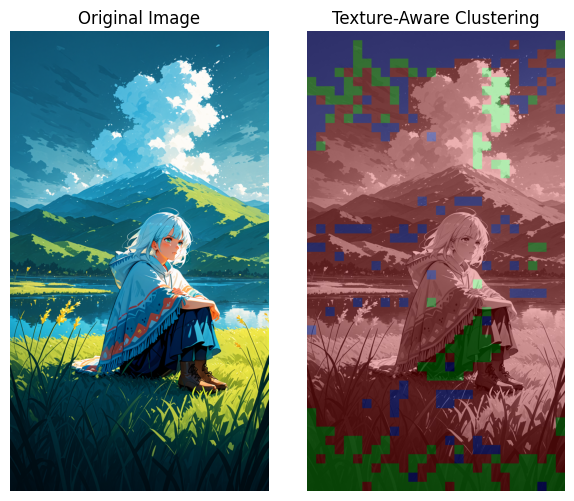

In [186]:
# Визуализация
params = {
    "lib": "cv2",
    'imglist': [img_cv2, result],
    'subtitlelist': [
        "Original Image", 
        "Texture-Aware Clustering"
    ],
    'figsize': (12, 5),
    'cols': 4,
    'cmaps': [None, None],
    'colorbars': [False, False],
    'show_axis': False
}

# Создание и запуск визуализатора
visualizer = ImageVisualizer(params)
visualizer.visualize()

### Анализ

Видно, что выделяются кластеры северного сияния (красный) и неба с водой (синий), качество так себе.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 12. Сегментация с использованием суперпикселей
1. Считать изображение с четко выраженными объектами.
2. Выполнить разбиение изображения на суперпиксели с помощью метода SLIC или Felzenszwalb.
3. Для каждого суперпикселя вычислить усредненные цветовые значения в пространстве LAB.
4. Выполнить кластеризацию K-means с $k=5$ на усредненных значениях суперпикселей.
5. Визуализировать результат, выделив области, соответствующие каждому кластеру, и сопоставить с исходным изображением.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем изображение

In [29]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/e26c75c1-33ed-470f-a997-b21f95316705/original=true,quality=90/54092661.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:29:36-089699 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [30]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Разбиваем изображение на суперпиксели

In [31]:
def suppix(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 4,
    lib: str = "cv2",
    n_segments: int = 100,
    method: str = "SLIC",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:

    liblist = ["cv2", "PIL"]
    methodlist = ["SLIC", "Felzenszwalb"]
    
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert method in methodlist, log.error(f"Некорректное значение method: {method}. Доступные варианты: {methodlist}")

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        # Ресайз изображения (ширина, высота)
        new_width = img.shape[1] // downscale_img_factor
        new_height = img.shape[0] // downscale_img_factor
        img = cv2.resize(img, (new_width, new_height))
        if len(img.shape) == 2:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        # Ресайз изображения (ширина, высота)
        new_width = img.width // downscale_img_factor
        new_height = img.height // downscale_img_factor
        img = img.resize((new_width, new_height))
        img_rgb = img.convert("RGB")

    # Применение сегментации
    if method == "SLIC":
        segments = slic(img_rgb, n_segments=n_segments, convert2lab=True)
    else:
        segments = felzenszwalb(img_rgb, scale=100 if method == "Felzenszwalb" else 1)

    # Конвертация в LAB
    if lib == "cv2":
        lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    else:
        lab = np.array(img_rgb.convert("LAB"))

    # Сбор признаков для кластеризации
    features = []
    superpixels = []
    for label in np.unique(segments):
        mask = segments == label
        superpixels.append(mask)
        features.append([
            np.mean(lab[:,:,0][mask]),
            np.mean(lab[:,:,1][mask]),
            np.mean(lab[:,:,2][mask])
        ])

    # Нормализация признаков
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Кластеризация K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(features_normalized)

    # Создание цветной маски
    mask = np.zeros_like(img_rgb)
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)
    colors = [cv2.cvtColor(np.array([[[h,255,200]]], dtype=np.uint8), cv2.COLOR_HSV2RGB)[0,0] for h in hues]
    
    # Генерируем цвета для кластеров в HSV и конвертируем в BGR
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)  # Оттенки HSV (0-180 в OpenCV)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 200]]]), cv2.COLOR_HSV2BGR)[0,0] for h in hues]

    # Закрашиваем суперпиксели цветами кластеров
    for i, (sp_mask, cluster_id) in enumerate(zip(superpixels, labels)):
        mask[sp_mask] = colors[cluster_id]

    # Смешивание с оригиналом
    result = cv2.addWeighted(img_rgb, 0.7, mask, 0.3, 0)
    
    return result

### Кластеризация

In [32]:
rez_slic = suppix(img_cv2, lib="cv2", n_clusters=30, method="SLIC", downscale_img_factor=2)

In [33]:
rez_felz = suppix(img_cv2, lib="cv2", n_clusters=30, method="Felzenszwalb", downscale_img_factor=3)

### Визуализация

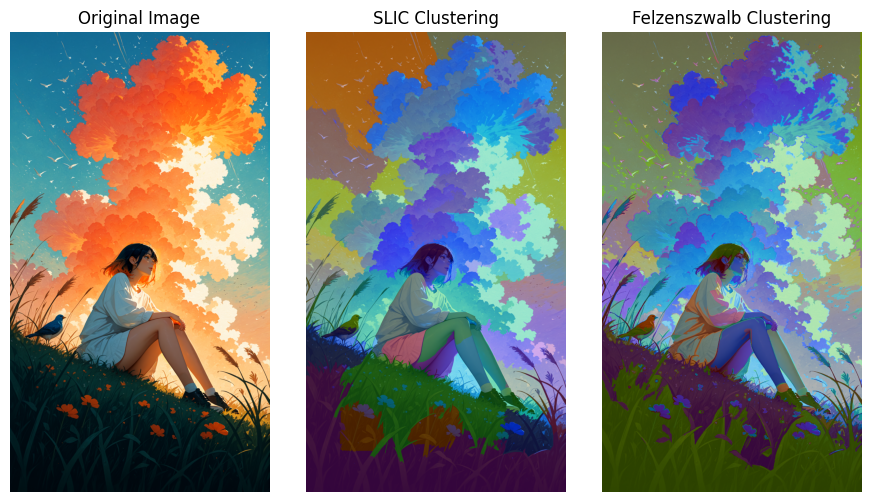

In [34]:
# Визуализация
params = {
    "lib": "cv2",
    'imglist': [img_cv2, rez_slic, rez_felz],
    'subtitlelist': [
        "Original Image", 
        "SLIC Clustering",
        "Felzenszwalb Clustering"
    ],
    'figsize': (12, 5),
    'cols': 4,
    'cmaps': [None, None, None],
    'colorbars': [False, False, False],
    'show_axis': False
}

# Создание и запуск визуализатора
visualizer = ImageVisualizer(params)
visualizer.visualize()

### Анализ

Вышло явно лучше, чем с GLCM и LBP. </br>
С большим количеством кластеров Felzenszwalb справляется лучше, но как я понял под капотом вычисления на узлах графов, </br>
так что не удивительно, что он срабатывает сравнительно дольше, чем SLIC. </br>
На мой взгляд классная альтернатива без тренинговых алгоритмов для первичной разметки, но никогда не угадаешь сколько нужно кластеров.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 13. Автоматическое выделение теней на изображении
1. Считать изображение, содержащее объекты с выраженными тенями.
2. Преобразовать изображение в цветовое пространство HSV.
3. Выделить области теней, анализируя значения канала Value (V), используя методы пороговой обработки и кластеризацию K-means с $k=2$.
4. Сопоставить выделенные области теней с исходным изображением, визуализируя результат.
5. Проанализировать, как изменения яркости и насыщенности в других частях изображения влияют на выделение теней.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [35]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/5599018a-9d8d-43b3-90fe-25358b4fa096/original=true,quality=90/54389484.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:29:43-180876 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [36]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Выделяем тени

In [37]:
def detshadow(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:

    liblist = ["cv2", "PIL"]
    
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")

    # Сохраняем исходные размеры для PIL
    if lib == "PIL" and isinstance(img, Image.Image):
        orig_width, orig_height = img.size
    else:
        orig_height, orig_width = img.shape[:2]

    # Ресайз и конвертация
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение OpenCV")
        
        # Получаем новые размеры после ресайза
        new_height = orig_height // downscale_img_factor
        new_width = orig_width // downscale_img_factor
        img_resized = cv2.resize(img, (new_width, new_height))
        
        # Конвертация в HSV
        img_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
        
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение PIL")
        
        # Ресайз и конвертация
        new_width = orig_width // downscale_img_factor
        new_height = orig_height // downscale_img_factor
        img_resized = img.resize((new_width, new_height))
        img_hsv = img_resized.convert("HSV")

    # Извлекаем канал Value
    if lib == "cv2":
        v_channel = img_hsv[:,:,2].astype(np.float32) / 255.0
    else:
        v_channel = np.array(img_hsv.getchannel("V"), dtype=np.float32) / 255.0

    X = v_channel.reshape(-1, 1)  # Подготовка для K-means

    # Кластеризация
    X = v_channel.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=random_state)
    labels = kmeans.fit_predict(X)

    # Создаем маску теней
    shadow_mask = (labels == np.argmin(kmeans.cluster_centers_))
    shadow_mask = shadow_mask.reshape(v_channel.shape).astype(np.uint8) * 255

    # Пороговая обработка
    _, binary_mask = cv2.threshold(shadow_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Масштабирование маски к исходному размеру
    if lib == "cv2":
        binary_mask = cv2.resize(binary_mask, (orig_width, orig_height))
        mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
        result = cv2.addWeighted(img, 1, mask, 1, 0)
    else:
        binary_mask = Image.fromarray(binary_mask).resize((orig_width, orig_height))
        result = Image.composite(img, Image.new("RGB", img.size), binary_mask)
        
    return result

In [38]:
result = detshadow(img_cv2, downscale_img_factor=1)

### Визуализация.

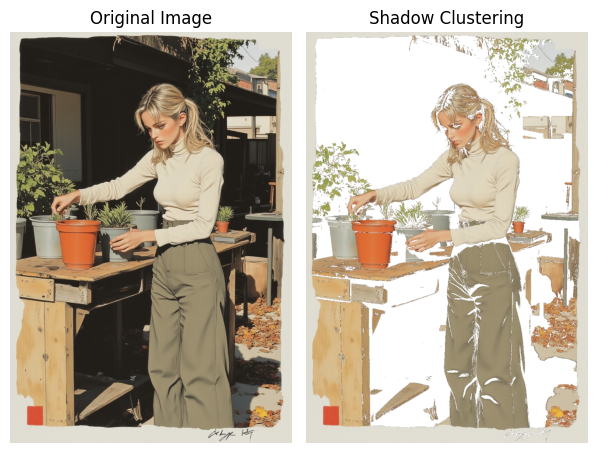

In [39]:
# Визуализация
params = {
    "lib": "cv2",
    'imglist': [img_cv2, result],
    'subtitlelist': [
        "Original Image", 
        "Shadow Clustering"
    ],
    'figsize': (12, 5),
    'cols': 4,
    'cmaps': [None, None],
    'colorbars': [False, False],
    'show_axis': False
}

# Создание и запуск визуализатора
visualizer = ImageVisualizer(params)
visualizer.visualize()

### Анализ

Изменения яркости (а также косвенно насыщенности) в не теневых областях могут привести к неправильной кластеризации, </br>
где некоторые не теневые области окажутся в теневом кластере, а наоборот — настоящие тени могут быть частично не выделены.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 14. Сравнение кластеризации с использованием нескольких алгоритмов
1. Считать цветное изображение и преобразовать его в формат HSV.
2. Выполнить кластеризацию изображения с использованием K-means, DBSCAN и агломеративной кластеризации, установив $k=4$ для всех методов.
3. Визуализировать результаты кластеризации для каждого метода.
4. Сравнить качество кластеризации на основе визуальной оценки и метрик, таких как Silhouette Score и Calinski-Harabasz Index.
5. Сделать выводы о применимости различных методов кластеризации для сегментации изображений.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [53]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/c4376d48-95ca-440a-b882-cf36bb02a0c4/original=true,quality=90/53908541.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:35:10-058865 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [54]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Оценка метриками

In [42]:
def calclustermetrics(features, labels):
    unique_labels = np.unique(labels)
    valid_labels = labels[labels != -1] if -1 in labels else labels

    if len(np.unique(valid_labels)) > 1 and len(valid_labels) > 0:
        if -1 in labels:
            mask = labels != -1
            filtered_features = features[mask]
            filtered_labels = labels[mask]
            silhouette = silhouette_score(filtered_features, filtered_labels)
            calinski = calinski_harabasz_score(filtered_features, filtered_labels)
        else:
            silhouette = silhouette_score(features, labels)
            calinski = calinski_harabasz_score(features, labels)
        print(f"Silhouette Score: {silhouette:.2f}, Calinski-Harabasz Index: {calinski:.2f}")
        return silhouette, calinski
    else:
        print("Cannot compute metrics: insufficient clusters or too much noise.")
        return None, None

### Кластеризация

In [85]:
def imgclustplus(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 4,
    lib: str = "cv2",
    method: str = "Kmeans",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["Kmeans", "DBSCAN", "Agglomerative"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    # Сохраняем исходные размеры
    if lib == "PIL" and isinstance(img, Image.Image):
        orig_width, orig_height = img.size
    else:
        orig_height, orig_width = img.shape[:2]

    # Ресайз и конвертация в HSV
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image")
        
        new_height = orig_height // downscale_img_factor
        new_width = orig_width // downscale_img_factor
        img_resized = cv2.resize(img, (new_width, new_height))
        img_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL image")
        
        new_width = orig_width // downscale_img_factor
        new_height = orig_height // downscale_img_factor
        img_resized = img.resize((new_width, new_height))
        img_hsv = img_resized.convert("HSV")
        img_rgb = np.array(img_resized.convert("RGB"))

    # Преобразование в массив признаков
    if lib == "PIL":
        img_hsv = np.array(img_hsv)
    h, s, v = cv2.split(img_hsv) if lib == "cv2" else (img_hsv[..., 0], img_hsv[..., 1], img_hsv[..., 2])

    features = np.column_stack((h.ravel(), s.ravel(), v.ravel()))
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Кластеризация
    if method == "Kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=random_state)
    elif method == "DBSCAN":
        model = DBSCAN(eps=0.09, min_samples=5)
    elif method == "Agglomerative":
        model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(features_normalized)

    # Рассчет метрик
    silhouette, calinski = calclustermetrics(features_normalized, labels)

    # Создание маски
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 220]]]), cv2.COLOR_HSV2RGB)[0,0] for h in hues]
    
    mask = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    for idx, label in enumerate(labels):
        row = idx // new_width
        col = idx % new_width
        if label == -1:
            mask[row, col] = [0, 0, 0]  # Шум в черный
        else:
            mask[row, col] = colors[label % n_clusters]

    # Апскейл и смешивание
    mask = cv2.resize(mask, (orig_width, orig_height), interpolation=cv2.INTER_NEAREST)
    img_rgb = cv2.resize(img_rgb, (orig_width, orig_height))
    result = cv2.addWeighted(img_rgb, 1, mask, 1, 0)
    
    return result, silhouette, calinski

In [86]:
# Кластеризация K-means
result_kmeans, silhouette_kmeans, calinski_kmeans = imgclustplus(img_cv2, lib="cv2", n_clusters=4, method="Kmeans", downscale_img_factor=12)

Silhouette Score: 0.52, Calinski-Harabasz Index: 44457.14


In [87]:
# Кластеризация DBSCAN
result_dbscan, silhouette_dbscan, calinski_dbscan = imgclustplus(img_cv2, lib="cv2", n_clusters=4, method="DBSCAN", downscale_img_factor=12)

Silhouette Score: -0.34, Calinski-Harabasz Index: 751.60


In [88]:
# Кластеризация Agglomerative
result_agg, silhouette_agg, calinski_agg = imgclustplus(img_cv2, lib="cv2", n_clusters=4, method="Agglomerative", downscale_img_factor=12)

Silhouette Score: 0.50, Calinski-Harabasz Index: 41817.83


### Визуализация

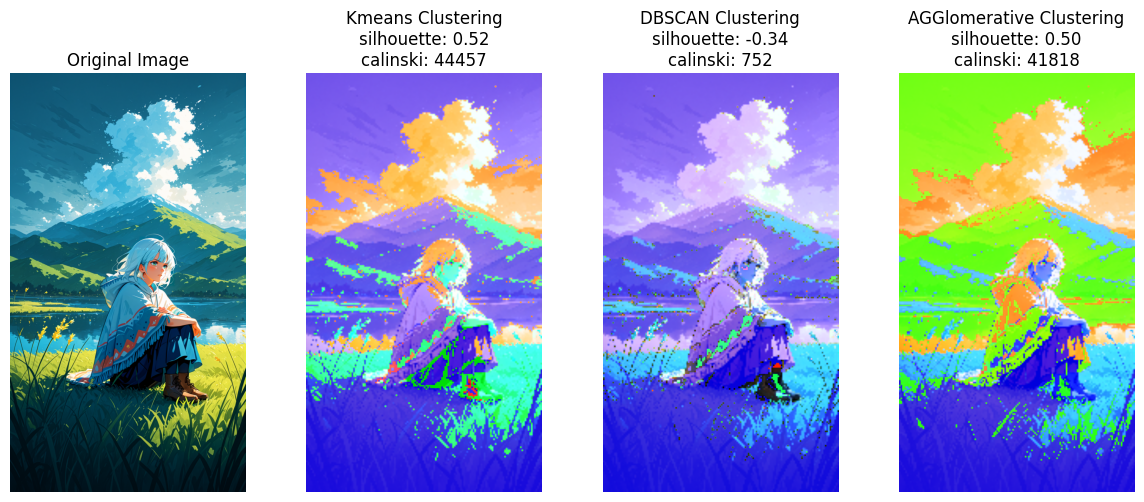

In [89]:
# Визуализация
params = {
    "lib": "cv2",
    'imglist': [img_cv2, result_kmeans, result_dbscan, result_agg],
    'subtitlelist': [
        "Original Image", 
        f"Kmeans Clustering\nsilhouette: {silhouette_kmeans:.2f}\ncalinski: {calinski_kmeans:.0f}",
        f"DBSCAN Clustering\nsilhouette: {silhouette_dbscan:.2f}\ncalinski: {calinski_dbscan:.0f}",
        f"AGGlomerative Clustering\nsilhouette: {silhouette_agg:.2f}\ncalinski: {calinski_agg:.0f}"
    ],
    'figsize': (12, 5),
    'cols': 4,
    'cmaps': [None, None, None, None],
    'colorbars': [False, False, False, False],
    'show_axis': False
}

# Создание и запуск визуализатора
visualizer = ImageVisualizer(params)
visualizer.visualize()

### Анализ

Обычная кластеризация Kmeans оказалась лучше, но агломерация совсем наступает на пятки. </br>
С DBSCAN проблема при подборе eps.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 15. Динамическая сегментация на основе комбинации гистограмм и кластеризации
1. Считать цветное изображение и преобразовать его в LAB.
2. Разделить изображение на сетку размером $n \times n$, где $n=8$.
3. Для каждого сегмента сетки построить гистограммы по каждому каналу LAB.
4. Объединить сегменты на основе сходства их гистограмм, применив кластеризацию K-means с автоматическим выбором $k$ (используя метод локтя).
5. Сравнить результаты сегментации с классической кластеризацией K-means по всему изображению.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [171]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/c4376d48-95ca-440a-b882-cf36bb02a0c4/original=true,quality=90/53908541.jpeg",
               "./cv_seminar_2",
               "example.jpg")

08:32:27-700783 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [172]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Кластеризация

In [173]:
def imgclustplushist(
    img: Union[np.ndarray, Image.Image],
    n_clusters: Optional[int] = None,
    patch_size: int = 8,
    lib: str = "cv2",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"

    # Оригинальное разрешение
    if lib == "PIL" and isinstance(img, Image.Image):
        orig_width, orig_height = img.size
    else:
        orig_height, orig_width = img.shape[:2]

    # Изменяем размер и конвертируем в LAB
    new_width = orig_width // downscale_img_factor
    new_height = orig_height // downscale_img_factor

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image")
        img_resized = cv2.resize(img, (new_width, new_height))
        img_lab = cv2.cvtColor(img_resized, cv2.COLOR_BGR2LAB)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL image")
        img_resized = img.resize((new_width, new_height))
        img_lab = np.array(img_resized.convert("LAB"))

    # Проверяем соответствие размера с размерностью патчей
    if (new_height % patch_size != 0) or (new_width % patch_size != 0):
        raise ValueError("Resized dimensions must be divisible by patch_size")

    # Извлекаем патчи
    patches = view_as_blocks(img_lab, block_shape=(patch_size, patch_size, 3))
    n_patches_y, n_patches_x = patches.shape[0], patches.shape[1]

    # Вычисляем гистограммы для каждого канала
    features = []
    for i in range(n_patches_y):
        for j in range(n_patches_x):
            patch = patches[i, j]
            l_hist = np.histogram(patch[..., 0], bins=256, range=(0, 256), density=True)[0]
            a_hist = np.histogram(patch[..., 1], bins=256, range=(0, 256), density=True)[0]
            b_hist = np.histogram(patch[..., 2], bins=256, range=(0, 256), density=True)[0]
            features.append(np.concatenate([l_hist, a_hist, b_hist]))

    # Нормализуем фичи
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Метод локтя для определения оптимального количества кластеров
    inertias = []
    k_values = range(2, 8)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(features_normalized)
        inertias.append(kmeans.inertia_)
    
    knee_locator = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
    optimal_k = knee_locator.elbow

    optimal_k = optimal_k if optimal_k is not None else (n_clusters if n_clusters is not None else 4)
    if n_clusters is not None:
        optimal_k = n_clusters

    # K-means кластеризация
    kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
    labels = kmeans.fit_predict(features_normalized)
    count_clust = len(np.unique(labels))
    
    # Создаем разноцветную маску
    mask = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    hues = np.linspace(0, 179, optimal_k, dtype=np.uint8)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 200]]]), cv2.COLOR_HSV2BGR)[0,0] for h in hues]

    for idx, label in enumerate(labels):
        i, j = divmod(idx, n_patches_x)
        y = i * patch_size
        x = j * patch_size
        mask[y:y+patch_size, x:x+patch_size] = colors[label]

    # Накладываем маску поверх оригинального изображения
    if lib == "cv2":
        vis_img = img_resized.copy()
    else:
        vis_img = cv2.cvtColor(np.array(img_resized.convert("RGB")), cv2.COLOR_RGB2BGR)
    
    result = cv2.addWeighted(vis_img, 0.7, mask, 0.3, 0)
    
    return result, count_clust

In [179]:
# Кластеризация K-means
result_kmeans, count = imgclustplushist(img_cv2, lib="cv2", patch_size=8, downscale_img_factor=1)

### Визуализация

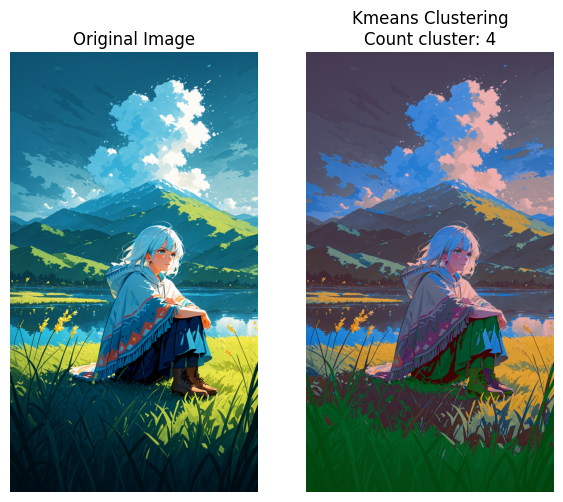

In [180]:
# Визуализация
params = {
    "lib": "cv2",
    'imglist': [img_cv2, result_kmeans],
    'subtitlelist': [
        "Original Image", 
        f"Kmeans Clustering\nCount cluster: {count}"
    ],
    'figsize': (12, 5),
    'cols': 4,
    'cmaps': [None, None],
    'colorbars': [False, False],
    'show_axis': False
}

# Создание и запуск визуализатора
visualizer = ImageVisualizer(params)
visualizer.visualize()

### Анализ

Ну выглядит неплохо, получше, чем обычная кластеризация, очевидно

# Выводы

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        1. Очередной раз налюбовались красивыми картинками.
        2. Прокачали продвинутый уровень владением OpenCV.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">